In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load data and extract variables

In [26]:
def load_data(data):
    dataset = pd.read_csv(data)
    return dataset

def variable_data(data):
    var_x = data.iloc[:,2].values
    var_y = data.iloc[:,1].values
    return var_x, var_y

**Considered the data, y is the purity of oxygen produced in a chemical distillation process, and x is the percentage of hydrocarbons present in the main condenser of the distillation unit.**

In [27]:
data = 'dataset/slr_data1.csv'
dataset = load_data(data)
#x, y = variable_data(dataset)

xData = dataset['x']
yData = np.array(dataset['y'])

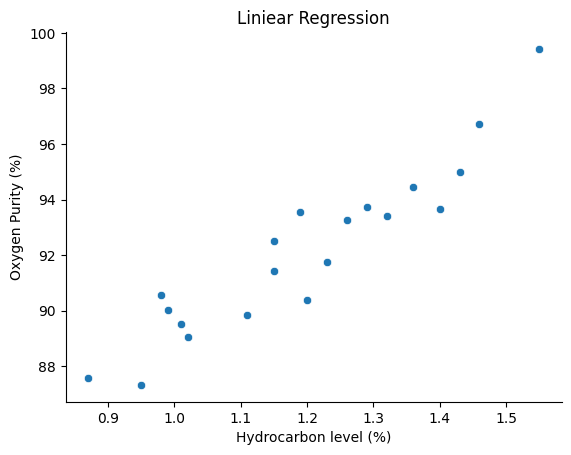

In [45]:
from myst_nb import glue
import seaborn as sns

fig = plt.figure()
ax = sns.scatterplot(x=xData, y=yData)
ax.set(title = 'Liniear Regression', ylabel = 'Oxygen Purity (%)', xlabel='Hydrocarbon level (%)')
sns.despine()
plt.show()
glue("sleepycorrelation-fig", fig, display=False)

# Run and Evaluate Model

In [46]:
# Calculate the mean of input (x) and output (y) data
x_mean = np.mean(xData)
y_mean = np.mean(yData)

# Calculate the terms of needed for slope (b1) and intercept (b2) of the regression line
numerator = np.sum((xData - x_mean) * (yData - y_mean))
denomerator = np.sum((xData - x_mean) ** 2)

# Calculate the slope (b1) and intercept (b2) of the regression line (regression equation)
slope_ = numerator / denomerator
intercept_ = y_mean - slope_ * x_mean

# Prediciton
y_pred = intercept_ + slope_ * xData

# Residual/Error
residual_ = yData - y_pred

# residual sum of squares (RSS)
RSS = np.sum(residual_ ** 2)
# total sum of squares (TSS)
TSS = np.sum((yData - y_mean) ** 2)


In [47]:
print(f"Simple linear equation: y = {intercept_:.2f} + {slope_:.2f}x")
print(f"Slope: {slope_:.2f}")
print(f"Intercept: {intercept_:.2f}")
print(f"Residual: {residual_}")
print(f"Residual sum of squares (RSS): {RSS:.2f}")
print(f"Total sum of squares (TSS): {TSS:.2f}")

Simple linear equation: y = 74.28 + 14.95x
Slope: 14.95
Intercept: 74.28
Residual: 0     0.928681
1    -0.479744
2    -0.042916
3     0.174437
4     0.623365
5    -0.161887
6     0.302378
7    -0.898714
8     1.968092
9    -1.559786
10    1.469185
11    1.047084
12    1.628156
13    0.159731
14   -1.025017
15   -1.830290
16    0.132861
17   -0.603987
18   -0.678210
19   -1.153420
Name: x, dtype: float64
Residual sum of squares (RSS): 21.25
Total sum of squares (TSS): 173.38


In [48]:
r2score_ = 1 - (RSS / TSS)
mae_ = np.mean(np.abs(yData - y_pred))
mse_ = np.average((yData - y_pred) ** 2, axis=0)
rmse_ = np.square(mse_)
sep_ = np.std(y_pred - yData)
rpd_ = np.std(yData)/sep_
bias_ = np.mean(y_pred - yData)

print(f"Coefficient of determination (R^2): {r2score_:.2f}")
print(f"Mean absolute error (MAE): {mae_:.2f}")
print(f"Mean squared error (MSE): {mse_:.2f}")
print(f"Root mean squared error (RMSE): {rmse_:.2f}")
print(f"Standard error prediction: {sep_:.2f}")
print(f"RPD: {rpd_:.2f}")
print(f"Bias: {bias_:.2f}")

Coefficient of determination (R^2): 0.88
Mean absolute error (MAE): 0.84
Mean squared error (MSE): 1.06
Root mean squared error (RMSE): 1.13
Standard error prediction: 1.03
RPD: 2.86
Bias: 0.00


# Plot model

       x      y
0   0.99  90.01
1   1.02  89.05
2   1.15  91.43
3   1.29  93.74
4   1.46  96.73
5   1.36  94.45
6   0.87  87.59
7   1.23  91.77
8   1.55  99.42
9   1.40  93.65
10  1.19  93.54
11  1.15  92.52
12  0.98  90.56
13  1.01  89.54
14  1.11  89.85
15  1.20  90.39
16  1.26  93.25
17  1.32  93.41
18  1.43  94.98
19  0.95  87.33


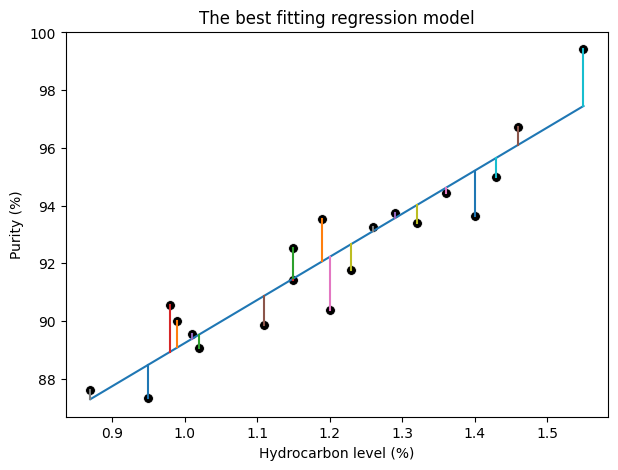

In [49]:
from scipy.optimize import curve_fit
def func(x, a, b):
    return a * x + b

intialParameters = np.array([1.0, 1.0])

fittedParameters, pcov = curve_fit(func, xData, yData, intialParameters)

modelPredictions = func(xData, *fittedParameters)

data = pd.DataFrame({'x': xData, 'y': yData})
print(data)
# plot data points
fig, ax = plt.subplots(figsize=(7,5))
sns.scatterplot(data= data, x='x', y='y', c='k', s=50)
ax.set_title('The best fitting regression model')
ax.set_xlabel('Hydrocarbon level (%)')
ax.set_ylabel('Purity (%)')

# add regression line
xModel = np.linspace(min(xData), max(xData))
yModel = func(xModel, *fittedParameters)
ax.plot(xModel, yModel)

# add drop lines
for i in range(len(xData)):
    lineXdata = (xData[i], xData[i])
    lineYdata = (yData[i], modelPredictions[i])
    ax.plot(lineXdata, lineYdata)

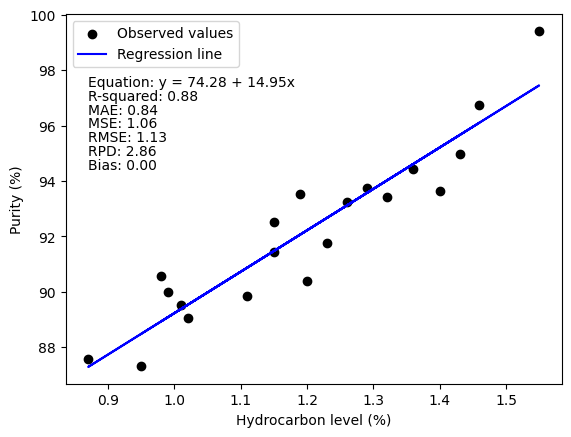

In [20]:
# create a scatterplot of the observed values
plt.scatter(xData, yData, color = 'black', label='Observed values')
# add a lineplot of the predicted values
#sns.lineplot(x = x, y = pred, color='red', marker='o', markers=True, label='Predicted values')
plt.plot(xData, y_pred, color='blue', label='Regression line')
# set labels and title
plt.xlabel('Hydrocarbon level (%)')
plt.ylabel('Purity (%)')

plt.text(np.min(xData), np.max(yData) - 2, f"Equation: y = {intercept_:.2f} + {slope_:.2f}x")
plt.text(np.min(xData), np.max(yData) - 2.5, f"R-squared: {r2score_:.2f}")
plt.text(np.min(xData), np.max(yData) - 3, f"MAE: {mae_:.2f}")
plt.text(np.min(xData), np.max(yData) - 3.5, f"MSE: {mse_:.2f}")
plt.text(np.min(xData), np.max(yData) - 4, f"RMSE: {rmse_:.2f}")
plt.text(np.min(xData), np.max(yData) - 4.5, f"RPD: {rpd_:.2f}")
plt.text(np.min(xData), np.max(yData) - 5, f"Bias: {bias_:.2f}")
        
plt.legend()
plt.show()

https://ethanweed.github.io/pythonbook/05.04-regression.html#estimating-a-linear-regression-model